In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os 
import sys

sys.path.append('../../boxcox')
sys.path.append('../../comparison')
sys.path.append('../../dCor')
sys.path.append('../../local_maximal_corr')
sys.path.append('../../MCI')

from img_comparison import compare_images

from scipy.spatial import distance
from main_lmc import LocalMaximalCorr
from minepy import MINE
import dcor 

from scipy.stats import pearsonr

In [2]:
def get_all_comp(img_1, img_2, method = 'full'):

    comp = compare_images(img_1, img_2)

    # dcor
    dcorr_func = lambda x, y: dcor.distance_correlation(x, y)
    dcor_res = comp.compare_images(function=dcorr_func, comparison_method= method)

    dcov_func = lambda x, y: dcor.distance_covariance(x, y)
    dcov_res = comp.compare_images(function=dcov_func, comparison_method= method)

    # # lmc
    # lmc = lambda x, y: LocalMaximalCorr(x, y).local_maximal_corr()[0]
    # lmc_res = comp.compare_images(function=lmc, comparison_method= method)

    # mic
    def mic(x, y):
        m = MINE(alpha=0.6, c=15, est="mic_e")
        m.compute_score(x, y)
        return m.mic()
    
    mic_e = lambda x, y:  mic(x, y)
    mic_e_res = comp.compare_images(function=mic_e, comparison_method= method)

    # tic
    def tic(x, y):
        m = MINE(alpha=0.6, c=15, est="mic_e")
        m.compute_score(x, y)
        return m.tic()
    tic_e = lambda x, y:  tic(x, y)
    tic_e_res = comp.compare_images(function=tic_e, comparison_method= method)


    # corr
    corr = lambda x, y: pearsonr(x, y)[0]
    corr_res = comp.compare_images(function=corr, comparison_method= method)

    return dcor_res,dcov_res , mic_e_res, tic_e_res, corr_res


    

In [3]:
images_df_full = pd.DataFrame(columns=['n_image', 'lambda_full','dcor_full', 'dcov_full' ,  'mic_full', 'tic_full', 'pearson_full'
                                           , 'lambda_hist', 'dcor_hist', 'dcov_hist' ,  'mic_hist', 'tic_hist', 'pearson_hist'
                                           , 'lambda_grid' , 'dcor_grid', 'dcov_grid' ,  'mic_grid', 'tic_grid', 'pearson_grid'
                                           ])

images_df_hist = pd.DataFrame(columns=['n_image', 'lambda_full','dcor_full', 'dcov_full' ,  'mic_full', 'tic_full', 'pearson_full'
                                             , 'lambda_hist', 'dcor_hist', 'dcov_hist' ,  'mic_hist', 'tic_hist', 'pearson_hist'
                                             , 'lambda_grid' , 'dcor_grid', 'dcov_grid' ,  'mic_grid', 'tic_grid', 'pearson_grid'
                                             ])


In [4]:
from box_cox_img import BoxCoxImg
import matplotlib.pyplot as plt

from tqdm import tqdm

# for i in tqdm(range(1, 25)):
#     img_path = f'../../boxcox/img/{i}.png'
    
#     BCI = BoxCoxImg(img_path)
#     # plt.imshow(BCI.bw_img, cmap='gray')
#     # plt.show()


#     #full
#     full_bc, lam_full = BCI.transform(method='full')
#     # plt.imshow(full_bc, cmap='gray')
#     # plt.show()
    

#     #hist
#     hist_bc, lam_hist = BCI.transform(method='hist')
#     # plt.imshow(hist_bc, cmap='gray')
#     # plt.show()

#     #grid
#     grid_bc, lam_grid = BCI.transform(method='grid')
#     # plt.imshow(grid_bc, cmap='gray')
#     # plt.show()

#     fig, ax = plt.subplots(1, 4, figsize=(20, 5))


#     ax[0].imshow(BCI.bw_img, cmap='gray')
#     ax[0].set_title('Original')
#     ax[0].grid(False)

#     ax[1].imshow(full_bc, cmap='gray')
#     ax[1].set_title(f'Method: full, lambda={lam_full:.2f}')
#     ax[1].grid(False)

#     ax[2].imshow(hist_bc, cmap='gray')
#     ax[2].set_title(f'Method: hist, lambda={lam_hist:.2f}')
#     ax[2].grid(False)

#     ax[3].imshow(grid_bc, cmap='gray')
#     ax[3].set_title(f'Method: grid, lambda={lam_grid:.2f}')
#     ax[3].grid(False)

#     plt.show()
#     dcor_full_full, dcov_full_full ,mic_full_full, tic_full_full, corr_full_full = get_all_comp(BCI.bw_img, full_bc, method='full')
#     print(f'full bc, full comp: dcor={dcor_full_full}, dcov={dcov_full_full}, mic={mic_full_full}, tic={tic_full_full}, corr={corr_full_full}')

#     dcor_full_hist, dcov_full_hist ,mic_full_hist, tic_full_hist, corr_full_hist = get_all_comp(BCI.bw_img, hist_bc, method='full')
#     print(f'hist bc, full comp: dcor={dcor_full_hist}, dcov={dcov_full_hist}, mic={mic_full_hist}, tic={tic_full_hist}, corr={corr_full_hist}')
    
#     dcor_full_grid, dcov_full_grid ,mic_full_grid, tic_full_grid, corr_full_grid = get_all_comp(BCI.bw_img, grid_bc, method='full')
#     print(f'grid bc, full comp: dcor={dcor_full_grid}, dcov={dcov_full_grid}, mic={mic_full_grid}, tic={tic_full_grid}, corr={corr_full_grid}')

#     dcor_hist_full, dcov_hist_full ,mic_hist_full, tic_hist_full, corr_hist_full = get_all_comp(BCI.bw_img, full_bc, method='hist')
#     print(f'full bc, hist comp: dcor={dcor_hist_full}, dcov={dcov_hist_full}, mic={mic_hist_full}, tic={tic_hist_full}, corr={corr_hist_full}')

#     dcor_hist_hist, dcov_hist_hist ,mic_hist_hist, tic_hist_hist, corr_hist_hist = get_all_comp(BCI.bw_img, hist_bc, method='hist')
#     print(f'hist bc, hist comp: dcor={dcor_hist_hist}, dcov={dcov_hist_hist}, mic={mic_hist_hist}, tic={tic_hist_hist}, corr={corr_hist_hist}')

#     dcor_hist_grid, dcov_hist_grid ,mic_hist_grid, tic_hist_grid, corr_hist_grid = get_all_comp(BCI.bw_img, grid_bc, method='hist')
#     print(f'grid bc, hist comp: dcor={dcor_hist_grid}, dcov={dcov_hist_grid}, mic={mic_hist_grid}, tic={tic_hist_grid}, corr={corr_hist_grid}')
    


#     images_df_full = pd.concat([images_df_full, pd.DataFrame([[i, lam_full, dcor_full_full, dcov_full_full, mic_full_full, tic_full_full, corr_full_full
#                                                             , lam_hist, dcor_full_hist, dcov_full_hist, mic_full_hist, tic_full_hist, corr_full_hist
#                                                             , lam_grid, dcor_full_grid, dcov_full_grid, mic_full_grid, tic_full_grid, corr_full_grid]]
#                                                             , columns=images_df_full.columns)], ignore_index=True)
                                                               


#     images_df_hist = pd.concat([images_df_hist, pd.DataFrame([[i, lam_full, dcor_hist_full, dcov_hist_full, mic_hist_full, tic_hist_full, corr_hist_full
#                                                             , lam_hist, dcor_hist_hist, dcov_hist_hist, mic_hist_hist, tic_hist_hist, corr_hist_hist
#                                                             , lam_grid, dcor_hist_grid, dcov_hist_grid, mic_hist_grid, tic_hist_grid, corr_hist_grid]]
#                                                             , columns=images_df_hist.columns)], ignore_index=True)
    
    
#     # break


# images_df_full.to_csv('./images_df_full.csv')
# images_df_hist.to_csv('./images_df_hist.csv')

images_df_full = pd.read_csv('./images_df_full.csv', index_col=0)
images_df_hist = pd.read_csv('./images_df_hist.csv', index_col=0)



In [5]:
images_df_full

,n_image,lambda_full,dcor_full,dcov_full,mic_full,tic_full,pearson_full,lambda_hist,dcor_hist,dcov_hist,mic_hist,tic_hist,pearson_hist,lambda_grid,dcor_grid,dcov_grid,mic_grid,tic_grid,pearson_grid
0,1,0.880472,0.999900,0.108957,1.0,13346.407180,0.999565,0.251473,0.981200,0.078885,1.0,13346.404486,0.951381,1.533934,0.997645,0.107776,1.000000,13346.408260,0.993311
1,2,0.626394,1.078246,0.034164,1.0,13350.628960,0.984811,-0.025927,0.000000,0.000000,1.0,13350.626391,0.545937,-1.616215,0.160502,0.001788,0.762494,6130.263772,0.170580
2,3,0.579545,1.001570,0.091142,1.0,13347.722766,0.991127,0.256054,0.998136,0.072742,1.0,13347.720590,0.946093,2.160517,0.985482,0.085873,1.000000,13347.748375,0.960615
3,4,0.583254,0.998806,0.091142,1.0,13345.712464,0.991576,0.200891,1.005883,0.069172,1.0,13345.668397,0.924022,0.465269,0.998488,0.086534,1.000000,13345.696300,0.983495
4,5,0.428073,0.990448,0.105188,1.0,13345.722169,0.969808,0.055734,0.969888,0.069262,1.0,13345.689191,0.844945,0.570438,0.994044,0.111032,1.000000,13345.730297,0.984398
5,6,0.468829,0.998515,0.135221,1.0,13345.932170,0.987411,0.392815,0.997469,0.127218,1.0,13345.961306,0.980753,1.504092,0.997214,0.178204,1.000000,13345.958637,0.994715
6,7,1.145614,0.997240,0.095568,1.0,13347.946714,0.999332,0.215229,0.982782,0.066974,1.0,13347.934391,0.935890,2.269852,0.984068,0.081236,1.000000,13347.930735,0.959633
7,8,0.463257,0.992899,0.141487,1.0,13345.580211,0.983775,0.416691,0.992423,0.136800,1.0,13345.580267,0.979627,1.247463,0.999076,0.177805,1.000000,13345.591103,0.997977
8,9,1.259442,0.998336,0.091023,1.0,13347.454210,0.997744,0.232930,1.014574,0.061476,1.0,13347.430613,0.928291,1.485544,0.998883,0.091326,1.000000,13347.444518,0.992713
9,10,0.859904,1.000768,0.087609,1.0,13346.045597,0.998922,0.251776,0.981286,0.061219,1.0,13346.042287,0.930676,21.738899,0.360061,0.013496,0.996946,10744.516281,0.366061


In [6]:
images_df_full[['n_image', 'lambda_full', 'dcor_full', 'mic_full',
    'pearson_full', 'lambda_hist', 'dcor_hist', 'mic_hist', 'pearson_hist',
      'pearson_hist', 'lambda_grid', 'dcor_grid', 
       'mic_grid', 'pearson_grid']].mean().sort_values(ascending=False)

lambda_grid     88.563173
n_image         12.000000
dcor_full        1.000357
mic_full         1.000000
mic_hist         1.000000
pearson_full     0.987437
mic_grid         0.970955
dcor_hist        0.947233
pearson_hist     0.924601
pearson_hist     0.924601
dcor_grid        0.865844
pearson_grid     0.842625
lambda_full      0.688366
lambda_hist      0.233516
dtype: float64

In [7]:
images_df_hist[['n_image', 'lambda_full', 'dcor_full', 'mic_full',
    'pearson_full', 'lambda_hist', 'dcor_hist', 'mic_hist', 'pearson_hist',
      'pearson_hist', 'lambda_grid', 'dcor_grid', 
       'mic_grid', 'pearson_grid']].mean().sort_values(ascending=False)

lambda_grid     88.563173
n_image         12.000000
lambda_full      0.688366
mic_full         0.483314
dcor_full        0.453417
mic_hist         0.450874
dcor_hist        0.424125
mic_grid         0.409863
dcor_grid        0.357291
lambda_hist      0.233516
pearson_full     0.161884
pearson_grid     0.114137
pearson_hist    -0.233827
pearson_hist    -0.233827
dtype: float64

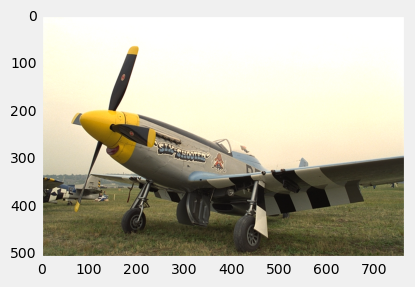

In [8]:
i = 20
img_path = f'../../boxcox/img/{i}.png'
plt.imshow(plt.imread(img_path), cmap='gray')
plt.grid(False)


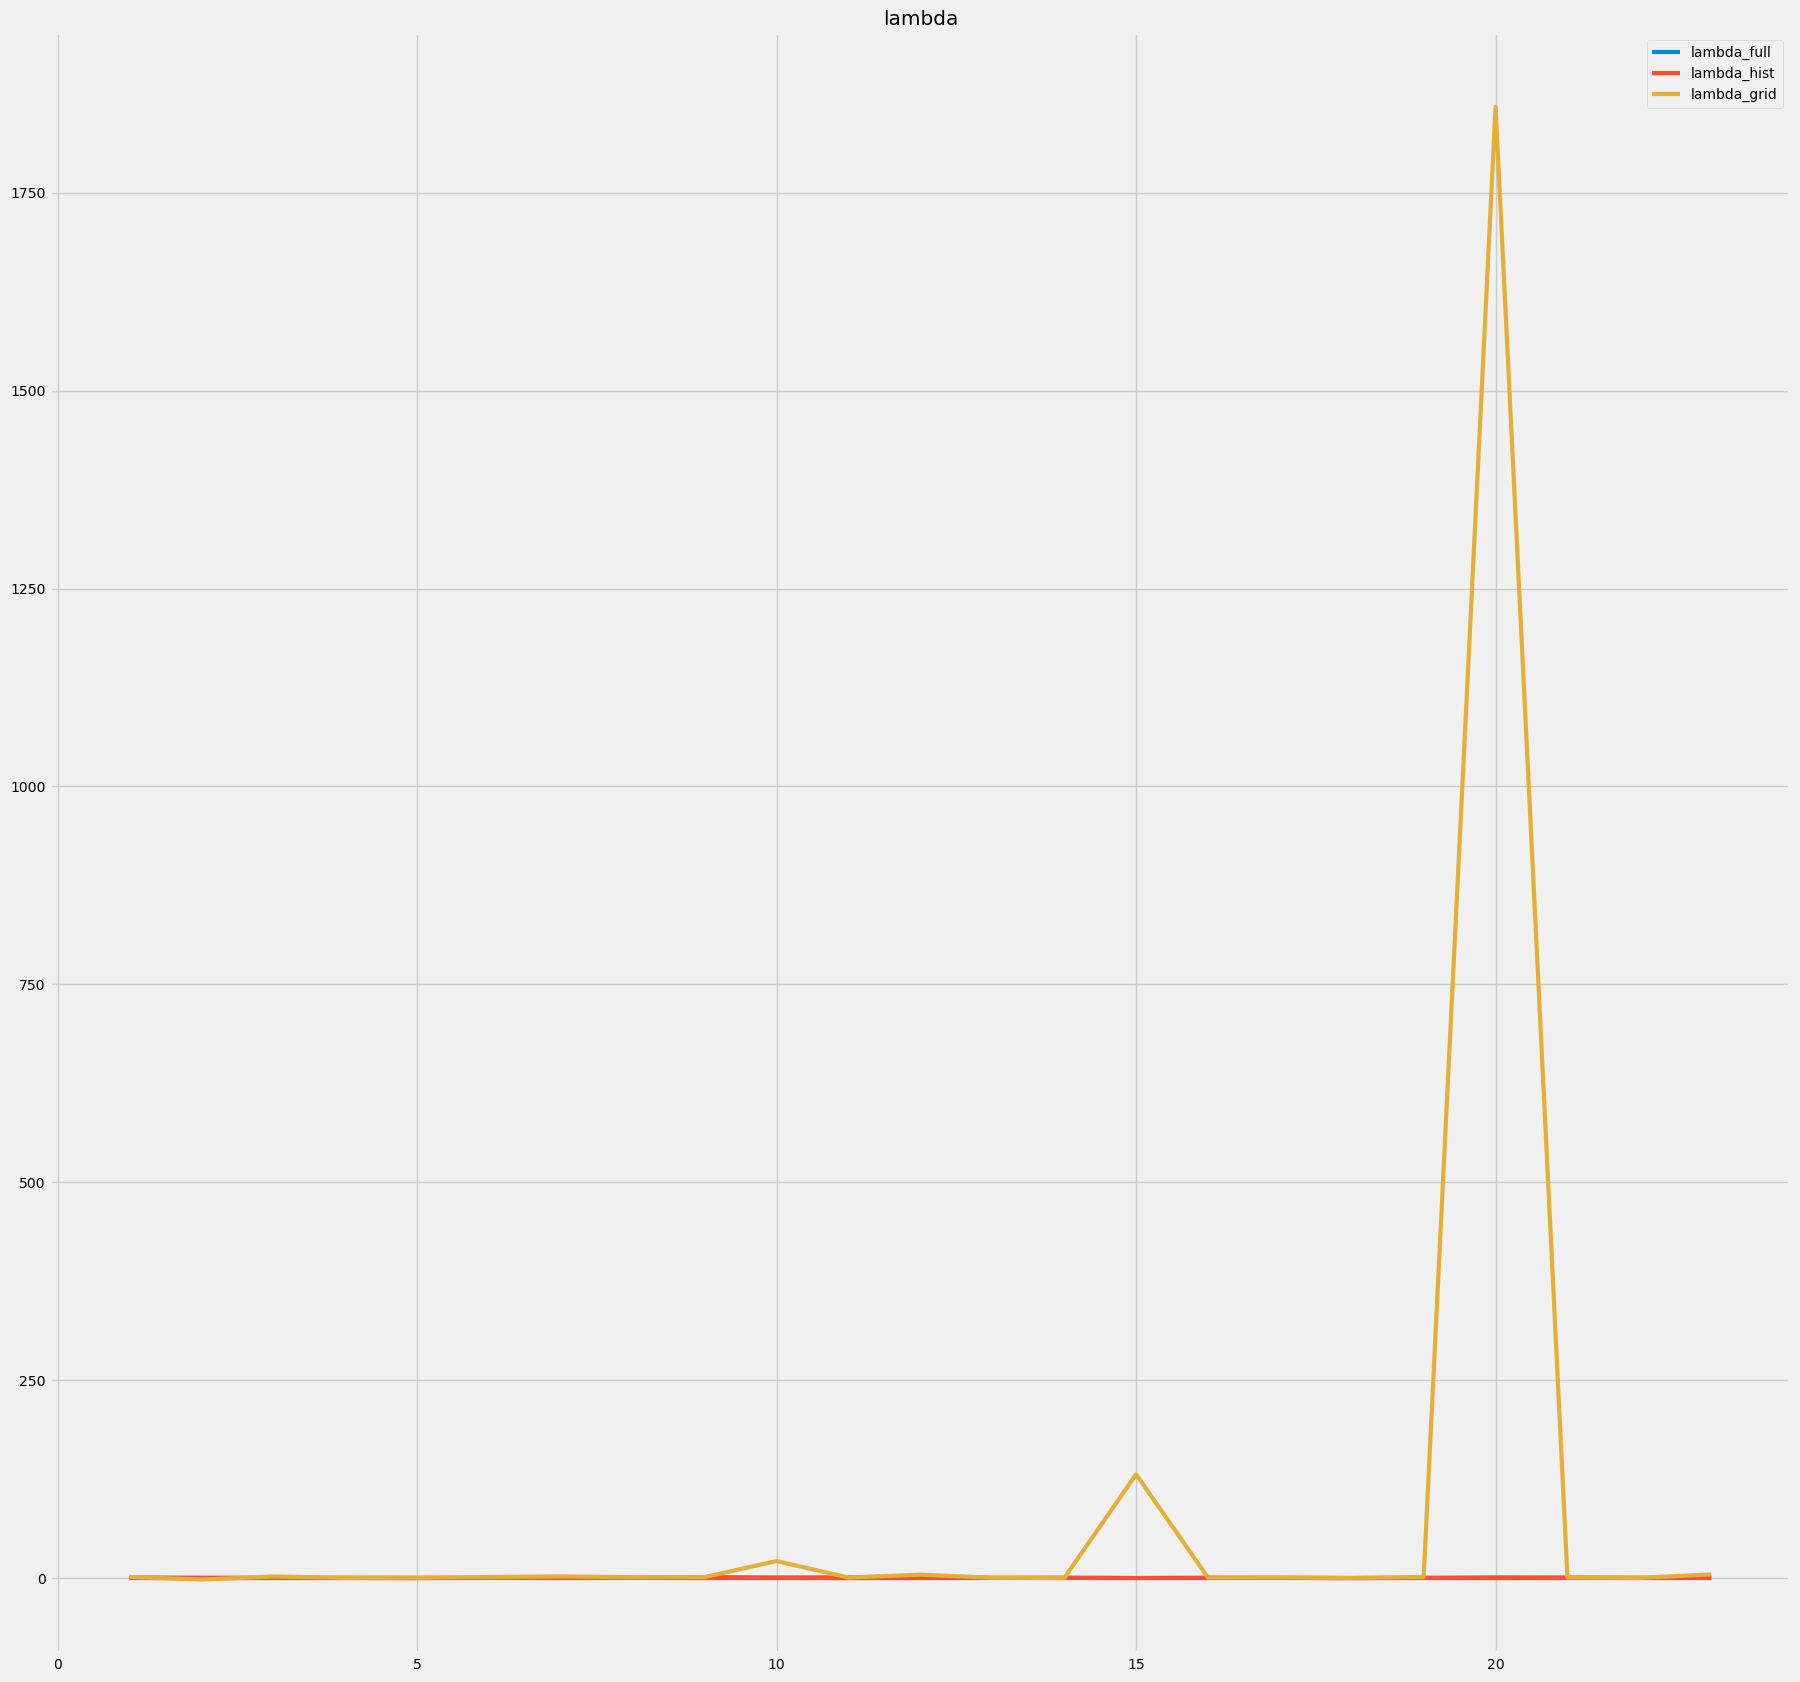

In [9]:
#plot plot plots for ecah comparison metho
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

ax.plot(images_df_full['n_image'], images_df_full['lambda_full'], label='lambda_full')
ax.plot(images_df_full['n_image'], images_df_full['lambda_hist'], label='lambda_hist')
ax.plot(images_df_full['n_image'], images_df_full['lambda_grid'], label='lambda_grid')
ax.set_title('lambda')
ax.legend()

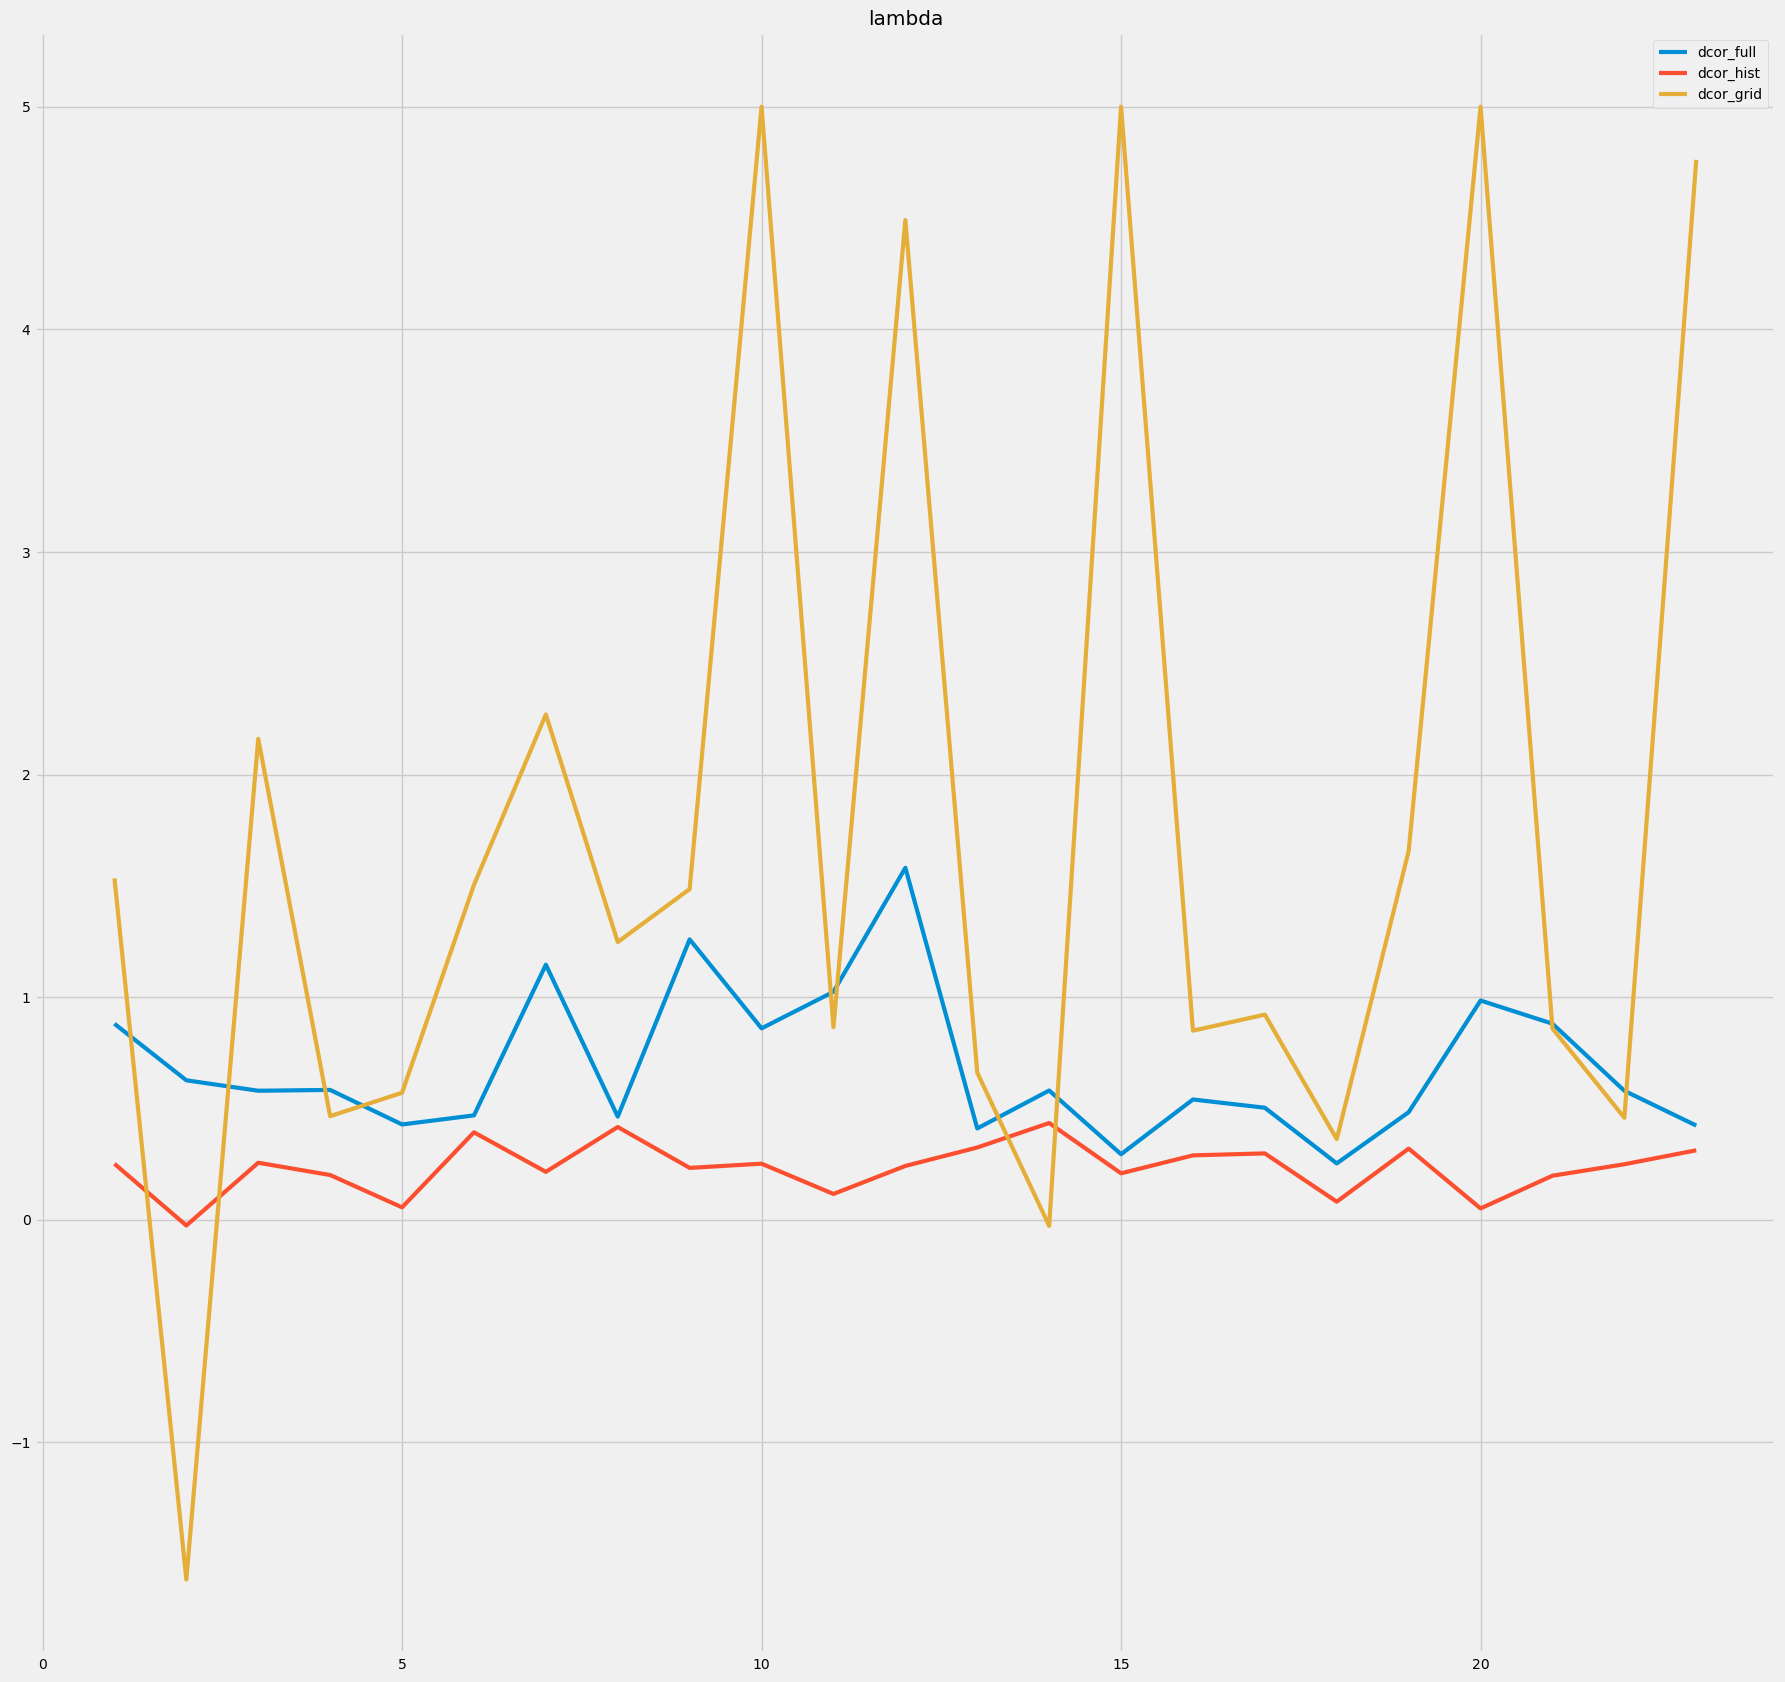

In [10]:
#plot plot plots for ecah comparison metho
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

ax.plot(images_df_full['n_image'], images_df_full['lambda_full'].clip(-5, 5), label='dcor_full')
ax.plot(images_df_full['n_image'], images_df_full['lambda_hist'].clip(-5, 5), label='dcor_hist')
ax.plot(images_df_full['n_image'], images_df_full['lambda_grid'].clip(-5, 5), label='dcor_grid')
ax.set_title('lambda')
ax.legend()

In [11]:
# calculate corr between lambdas
print('corr between lambdas')
print('full, hist')
print(pearsonr(images_df_full['lambda_full'], images_df_full['lambda_hist']))
print('full, grid')
print(pearsonr(images_df_full['lambda_full'], images_df_full['lambda_grid']))
print('hist, grid')
print(pearsonr(images_df_full['lambda_hist'], images_df_full['lambda_grid']))


corr between lambdas
full, hist
PearsonRResult(statistic=-0.16213711488224988, pvalue=0.45982726263135243)
full, grid
PearsonRResult(statistic=0.1785803546137855, pvalue=0.4149206219890334)
hist, grid
PearsonRResult(statistic=-0.341712505241017, pvalue=0.11051680529352965)


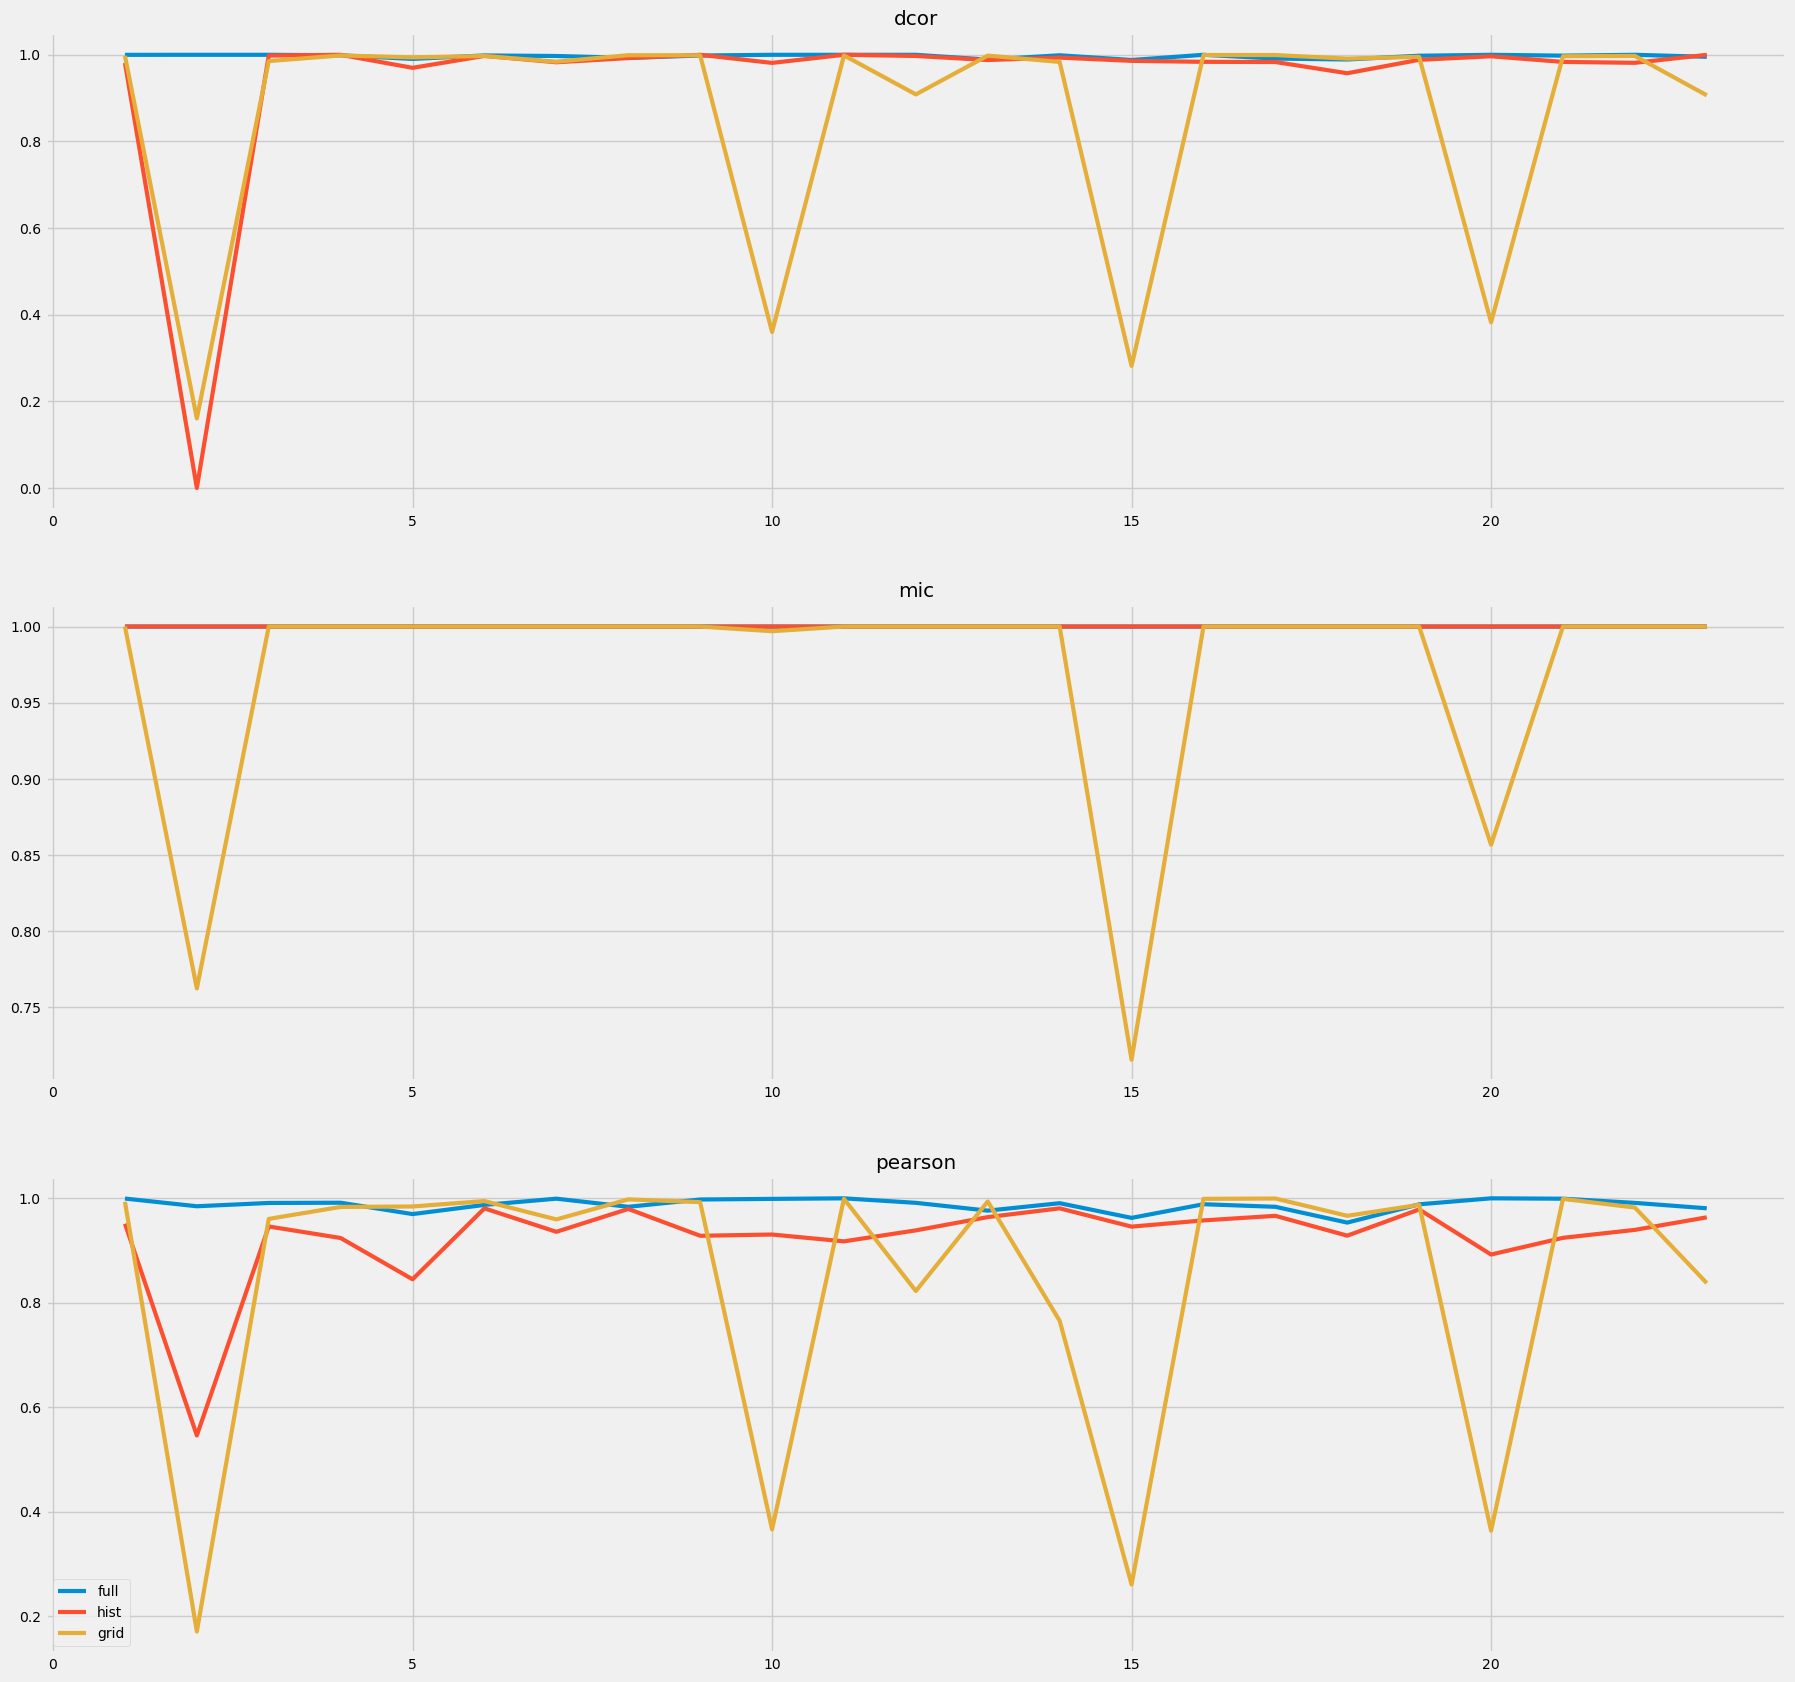

In [25]:
#plot plot plots for ecah comparison metho
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

ax[0].plot(images_df_full['n_image'], images_df_full['dcor_full'].clip(0,1), label='full')
ax[0].plot(images_df_full['n_image'], images_df_full['dcor_hist'].clip(0,1), label='hist')
ax[0].plot(images_df_full['n_image'], images_df_full['dcor_grid'].clip(0,1), label='grid')
ax[0].set_title('dcor')

ax[1].plot(images_df_full['n_image'], images_df_full['mic_full'], label='full')
ax[1].plot(images_df_full['n_image'], images_df_full['mic_hist'], label='hist')
ax[1].plot(images_df_full['n_image'], images_df_full['mic_grid'], label='grid')  
ax[1].set_title('mic')

# ax[2].plot(images_df_full['n_image'], images_df_full['tic_full'], label='full')
# ax[2].plot(images_df_full['n_image'], images_df_full['tic_hist'], label='hist')
# ax[2].plot(images_df_full['n_image'], images_df_full['tic_grid'], label='grid')
# ax[2].set_title('tic')

ax[2].plot(images_df_full['n_image'], images_df_full['pearson_full'], label='full')
ax[2].plot(images_df_full['n_image'], images_df_full['pearson_hist'], label='hist')
ax[2].plot(images_df_full['n_image'], images_df_full['pearson_grid'], label='grid')
ax[2].set_title('pearson')

plt.legend()



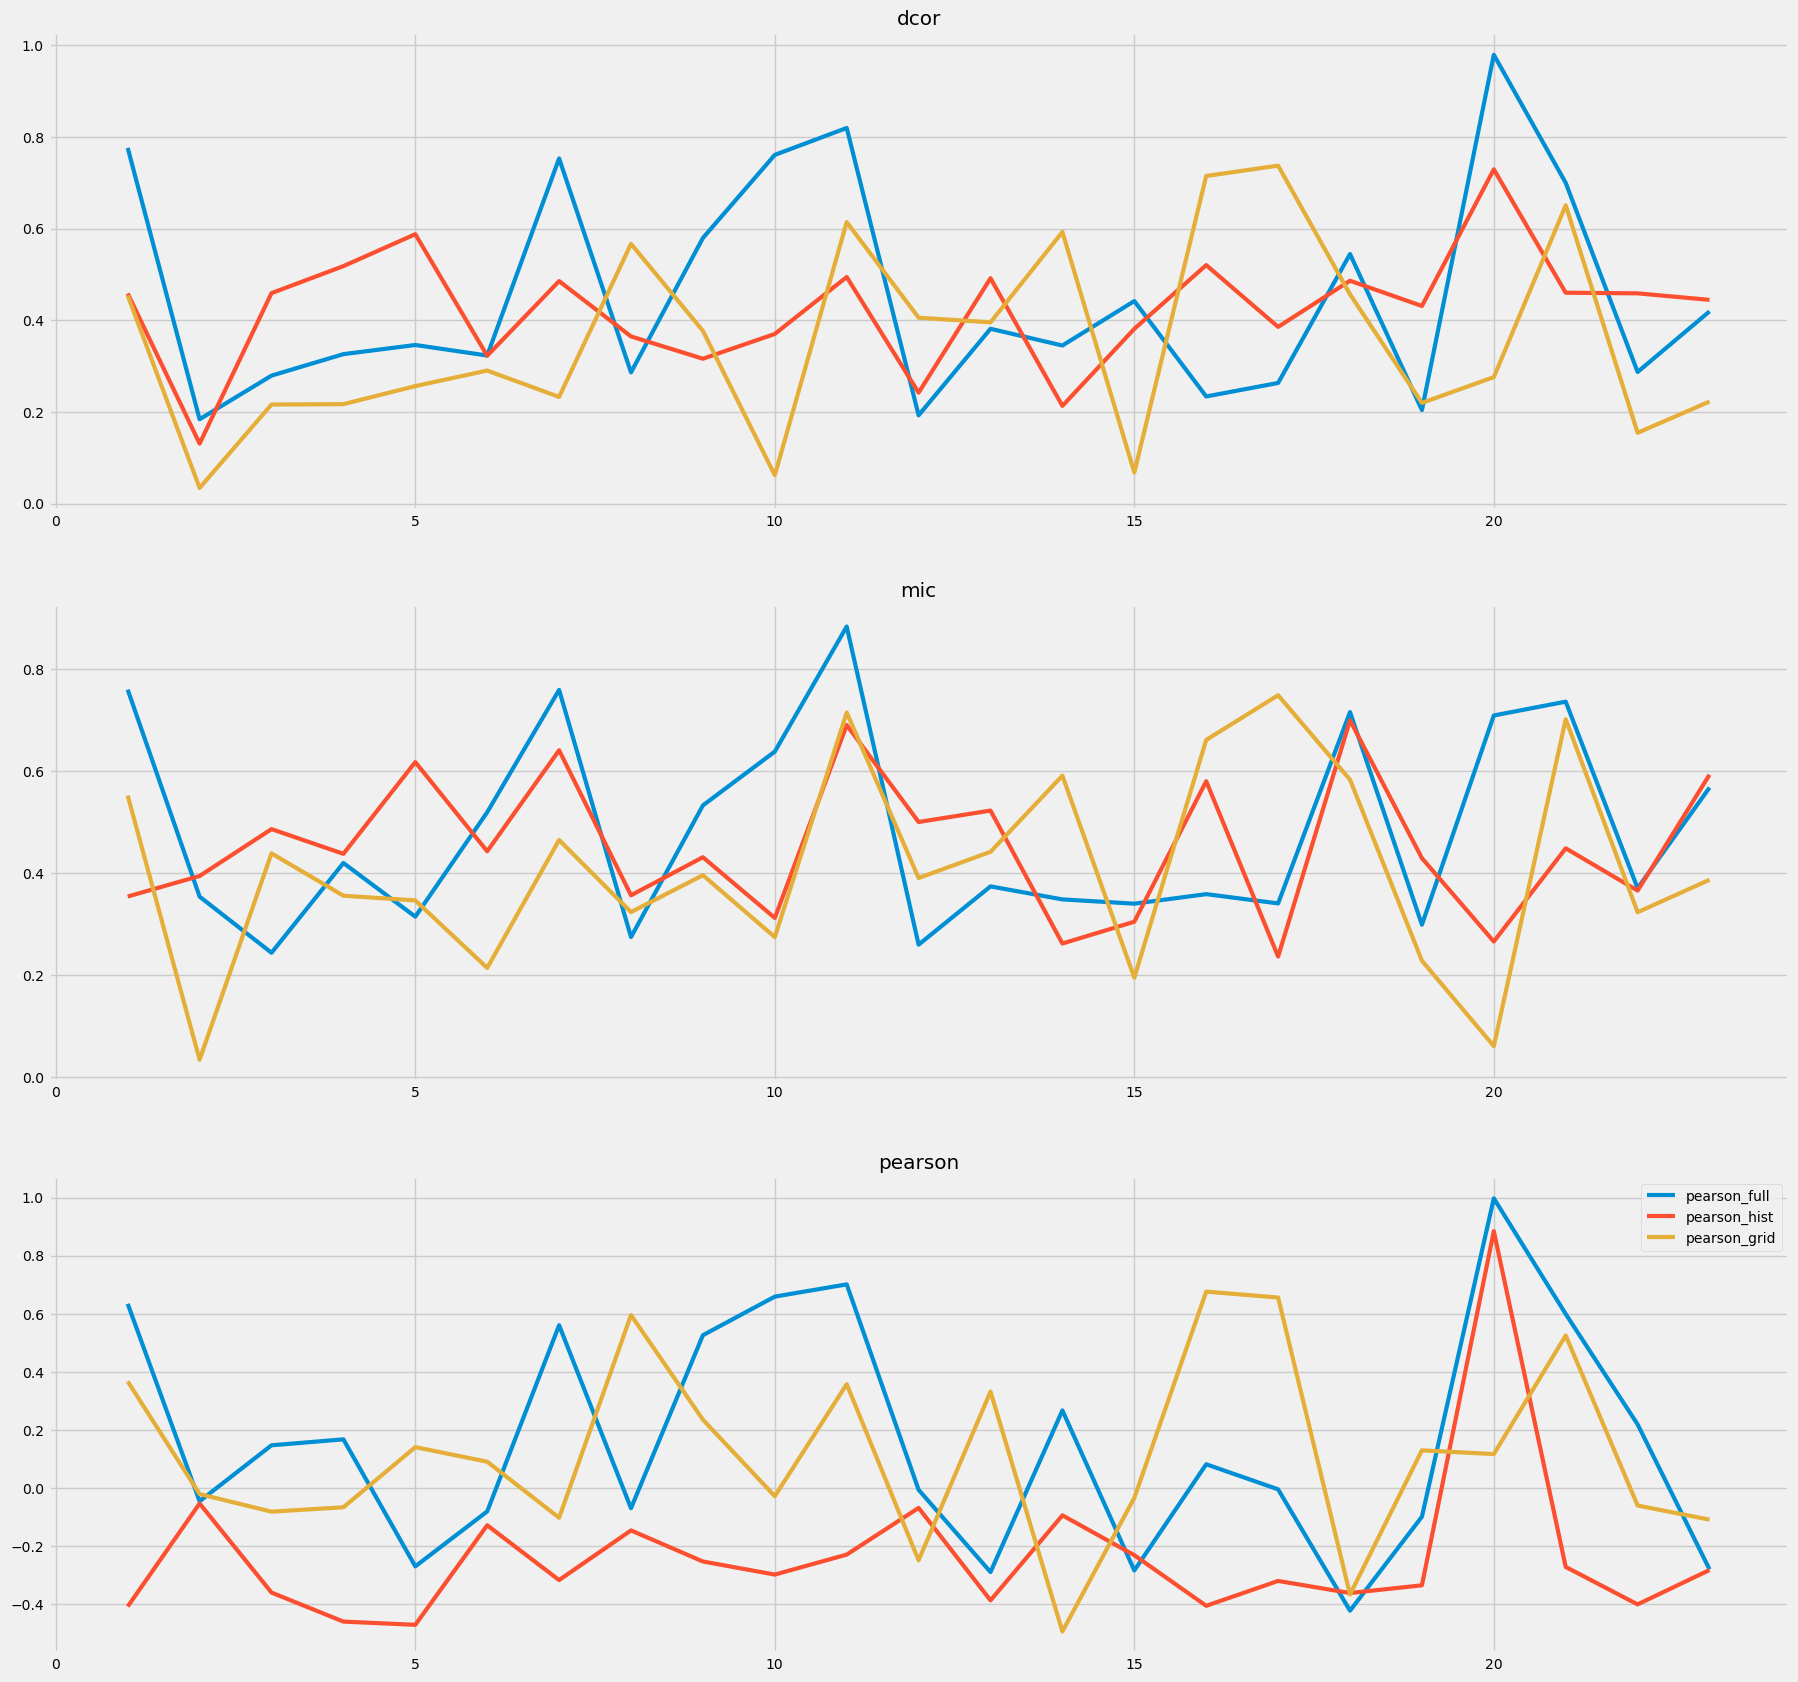

In [23]:
#plot plot plots for ecah comparison metho
fig, ax = plt.subplots(3, 1, figsize=(20, 20))

ax[0].plot(images_df_hist['n_image'], images_df_hist['dcor_full'].clip(0,1), label='full')
ax[0].plot(images_df_hist['n_image'], images_df_hist['dcor_hist'].clip(0,1), label='hist')
ax[0].plot(images_df_hist['n_image'], images_df_hist['dcor_grid'].clip(0,1), label='grid')
ax[0].set_title('dcor')

ax[1].plot(images_df_hist['n_image'], images_df_hist['mic_full'], label='full')
ax[1].plot(images_df_hist['n_image'], images_df_hist['mic_hist'], label='hist')
ax[1].plot(images_df_hist['n_image'], images_df_hist['mic_grid'], label='grid')  
ax[1].set_title('mic')

# ax[2].plot(images_df_hist['n_image'], images_df_hist['tic_full'], label='full')
# ax[2].plot(images_df_hist['n_image'], images_df_hist['tic_hist'], label='hist')
# ax[2].plot(images_df_hist['n_image'], images_df_hist['tic_grid'], label='grid')
# ax[2].set_title('tic')


ax[2].plot(images_df_hist['n_image'], images_df_hist['pearson_full'], label='full')
ax[2].plot(images_df_hist['n_image'], images_df_hist['pearson_hist'], label='hist')
ax[2].plot(images_df_hist['n_image'], images_df_hist['pearson_grid'], label='grid')
ax[2].set_title('pearson')

# add legend for each plot
plt.legend()


